<h1 style = "font-size:3rem;color:DarkCyan">Preprocessing Data for Unsupervised Learning</h1>

- extract features
- scale
- reduce dimensionality when needed
- save to dataset

In [1]:
#import libraries
import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import librosa, librosa.display 
import IPython.display as ipd
import scipy
import os
import pandas as pd

In [2]:
# import dataset containing songs of different musical genres

filenames = os.listdir('./data')
print(f'Number of audio files: {len(filenames)} ')


Number of audio files: 400 


<h2 style = "font-size:2rem;color:DarkCyan">Extracting features</h2>

- Extracting many features (we'll reduce them later) for each audio file, and store in a NxF matrix
- Take the mean to deal with uneven file lengths

In [4]:
def extract_features(data):
    return [
        np.mean(librosa.feature.spectral_centroid(y = data)),
        np.mean(librosa.feature.spectral_bandwidth(y = data)),
        np.mean(librosa.feature.spectral_flatness(y = data)),
        np.mean(librosa.feature.spectral_rolloff(y = data)),
        np.mean(librosa.feature.mfcc(y = data)),
        np.mean(librosa.feature.spectral_contrast(y = data)),
        np.mean(librosa.feature.zero_crossing_rate(y = data)),
        np.mean(librosa.feature.rms(y = data)),
        np.mean(librosa.feature.tempogram(y=data))
    ]

In [97]:
sr = 48000
feature_names = ['sc', 'sbw', 'sf', 'sr', 'mfcc', 'scon', 'zcr', 'rms', 'tg']
amount_of_features = len(feature_names)

features = np.zeros((len(filenames), amount_of_features))

for i in range(len(filenames)):
    data, dummy = librosa.load('./data/' + filenames[i], sr = sr, mono=True)
    
    # extract features
    features[i] = extract_features(data)  
    
    # print process every 5%
    if i % (len(filenames) // 20) == 0: 
        print(f'{100 * i // len(filenames)}% processed')

0% processed
5% processed
10% processed
15% processed
20% processed
25% processed
30% processed
35% processed
40% processed
45% processed
50% processed
55% processed
60% processed
65% processed
70% processed
75% processed
80% processed
85% processed
90% processed
95% processed


<h2 style = "font-size:2rem;color:DarkCyan">Plotting features</h2>

<IPython.core.display.Javascript object>


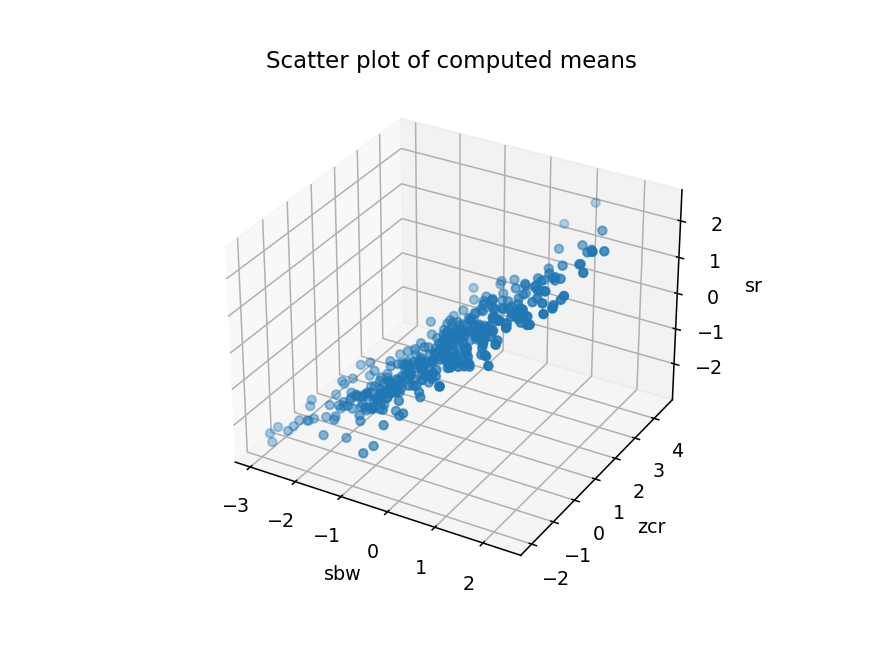

Text(0.5, 0.92, 'Scatter plot of computed means')

In [105]:
f_dict = {'sc' : 0, 'sbw' : 1, 'sf': 2, 'sr' : 3, 'mfcc' : 4, 'scon' : 5,'zcr' : 6, 'rms': 7, 'tg' : 8}
# choose three features

f1 = 'sbw'
f2 = 'zcr'
f3 = 'sr'

# plot the features
%matplotlib notebook
#fig = plt.figure(figsize = (15, 9))
ax = plt.axes(projection ="3d")
ax.scatter3D(features[:,f_dict[f1]], features[:,f_dict[f2]], features[:, f_dict[f3]])

ax.set_xlabel(f1)
ax.set_ylabel(f2)
ax.set_zlabel(f3)
#plt.scatter(feature2[:,0], feature2[:,1])
plt.title('Scatter plot of computed means')

<h2 style = "font-size:2rem;color:DarkCyan">Scale features & plot again</h2>

- scale features for better comparison (after this step features will present zero mean and unit variance)

In [106]:
print('Mean and std before scaling',np.mean(features, axis=0),np.std(features, axis=0))

features = sklearn.preprocessing.scale(features)

print('Mean and std after scaling',np.mean(features, axis=0),np.std(features, axis=0))

Mean and std before scaling [-6.49799659e-15  3.21298543e-15  9.40220124e-18  2.02979994e-15
 -1.09079412e-16 -1.01937903e-14  3.78586051e-16 -2.41751064e-16
  4.09644541e-15] [1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean and std after scaling [ 1.26842981e-16  1.08246745e-17  5.20417043e-19 -4.87283824e-17
  3.35842465e-17  3.13360449e-16  5.44009282e-17 -1.08246745e-17
  3.59434704e-17] [1. 1. 1. 1. 1. 1. 1. 1. 1.]


<IPython.core.display.Javascript object>


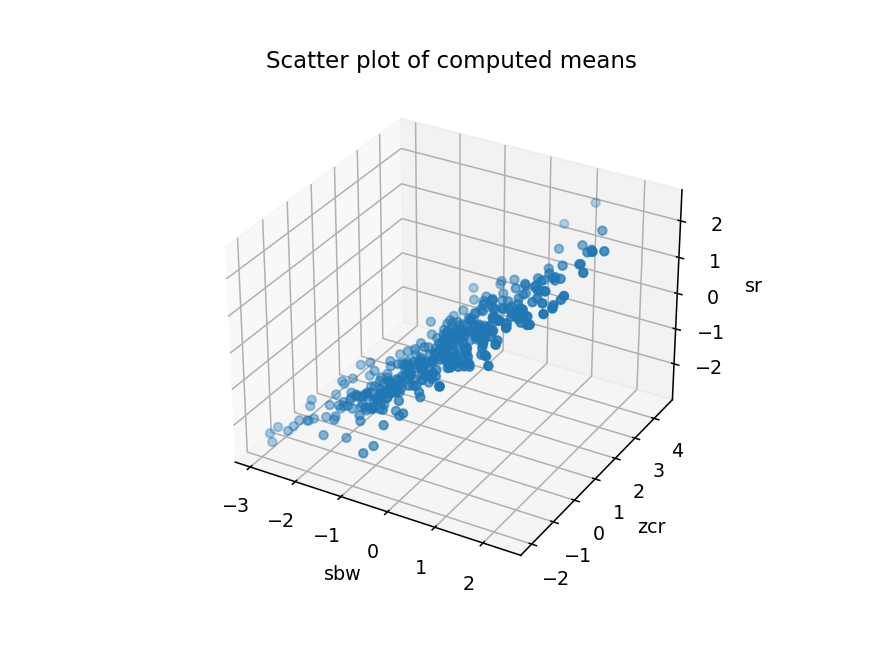

Text(0.5, 0, 'sr')

In [107]:
# plot the features
%matplotlib notebook
#fig = plt.figure(figsize = (15, 9))
ax = plt.axes(projection ="3d")
ax.scatter3D(features[:,f_dict[f1]], features[:,f_dict[f2]], features[:, f_dict[f3]])

#plt.scatter(feature2[:,0], feature2[:,1])
plt.title('Scatter plot of computed means')
ax.set_xlabel(f1)
ax.set_ylabel(f2)
ax.set_zlabel(f3)

<h2 style = "font-size:2rem;color:DarkCyan">Correlation Matrix</h2>

In [108]:
def plot_correlation_matrix(features, feature_labels, cmap= 'coolwarm', size = [6,6], fontsize=7):
    # get correlation matrix
    df = pd.DataFrame(features, columns=feature_labels)
    corr = np.array(df.corr())
    
    print(corr[0])
    
    title = 'Correlation Matrix'
        
    fig, ax = plt.subplots(figsize=size)
    im = ax.imshow(corr, interpolation='nearest', cmap= cmap)
    ax.figure.colorbar(im, ax=ax)
    
    
    # set labels ticks
    ticks = np.arange(corr.shape[1])
    ax.set(xticks=ticks,
           yticks=ticks,
           xticklabels=feature_labels, 
           yticklabels=feature_labels,
          )
    
    ax.set_title(title, fontsize = 20)

    #style tick labels
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor", color = 'darkgrey', fontsize = fontsize , weight='bold')
    plt.setp(ax.get_yticklabels(), ha="right",
             rotation_mode="anchor", color = 'darkgrey', fontsize = fontsize, weight = 'bold')
    
    # plot text annotation inside each segment
    for i in range(corr.shape[0]):
        for j in range(corr.shape[1]):
            ax.text(j, i, format(corr[i, j], '.3f'),
                    ha="center", va="center",
                    color="black",
                    fontsize = fontsize)
    
    fig.tight_layout()
    plt.show()

[ 1.          0.88787566  0.01472964  0.97606801  0.27513023 -0.17626071
  0.92456399  0.32238487  0.10258228]


<IPython.core.display.Javascript object>


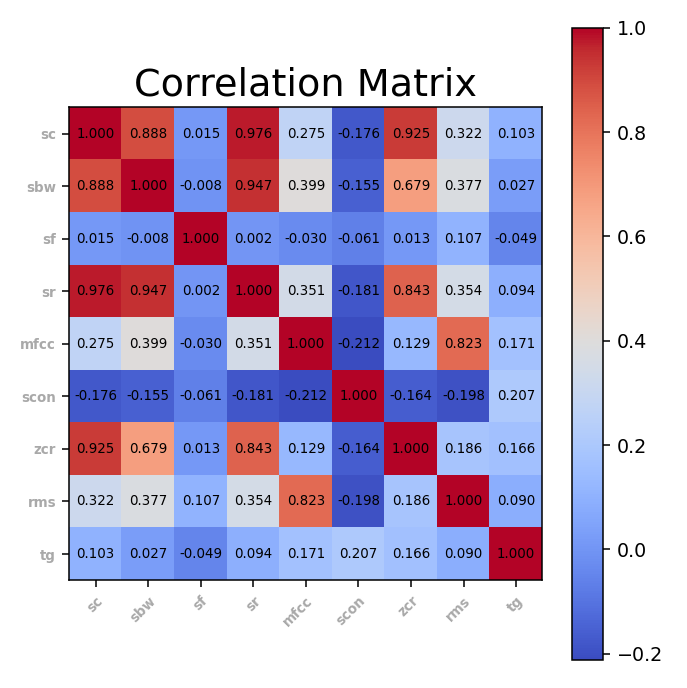

In [109]:
plot_correlation_matrix(features, feature_names, size=[5,5])

<h2 style = "font-size:2rem;color:DarkCyan">Dimensionality Reduction</h2>

In [110]:
# from the correlation matrix can be seen that there are 
# spectral centroid, bandwidth, and roll-off are strongly correrelated 
# with other features, these can be discarded to simplify the model
features_to_exclude = ['sc', 'sf', 'sr', 'mfcc']
print(np.shape(features))
indexes = np.where(np.isin(feature_names,features_to_exclude))
print(indexes)

selected_features = []
new_feature_names =[]
for i in range(0,amount_of_features):
    if not np.isin(i,indexes):
        selected_features.append(features[:,i])
        new_feature_names.append(feature_names[i])
        
#features = features[:,2:]
selected_features= np.array(selected_features).T
print(np.shape(selected_features))
print(new_feature_names)
#feature_names = feature_names[2:]

(400, 9)
(array([0, 2, 3, 4], dtype=int64),)
(400, 5)
['sbw', 'scon', 'zcr', 'rms', 'tg']


<h2 style = "font-size:2rem;color:DarkCyan">Save Features</h2>

- scale features for better comparison (after this step features will present zero mean and unit variance)

In [111]:
#merging everything into a single data structure
dataset = pd.DataFrame(selected_features)
dataset.columns = new_feature_names #naming the features
dataset['filename'] = filenames

#we can save the dataset to a file to resume working without re-computing the features (unless you want to change them)
dataset.to_csv('dataset.csv')
dataset

,sbw,scon,zcr,rms,tg,filename
0,1.222329,0.864234,0.177828,2.038501,2.379083,country.00000.wav
1,1.238002,0.451622,0.673754,1.703651,2.812887,country.00001.wav
2,0.661673,0.310009,-0.743647,0.144000,0.826554,country.00002.wav
3,-0.240139,1.060749,-0.023306,1.213736,0.654642,country.00003.wav
4,1.302863,0.321903,0.631281,1.315193,2.560773,country.00004.wav
...,...,...,...,...,...,...
395,1.001297,-0.748348,0.006054,0.372957,0.373265,reggae.00095.wav
396,-1.873327,-1.124472,-0.670458,0.390389,0.013986,reggae.00096.wav
397,-0.655795,0.700545,-0.273649,-0.512144,2.140940,reggae.00097.wav
398,-0.086576,-0.245017,-1.014102,-0.015369,-0.694718,reggae.00098.wav
